<a href="https://colab.research.google.com/github/simonebugo/PPD_MAS/blob/main/Elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

target_file = "elections experiment_new-table.csv"

# Impostiamo lo stile grafico
sns.set_theme(style="whitegrid", context="talk")

In [2]:
# 1. Caricamento
# NetLogo ha solitamente 6 righe di intestazione. Proviamo a saltarle.
try:
    df = pd.read_csv(target_file, skiprows=6)
except:
    # Se il file fosse già pulito o diverso, leggiamo normale
    df = pd.read_csv(target_file)

 # 2. Pulizia Nomi Colonne
# Rimuoviamo parentesi quadre e spazi extra dai nomi originali di NetLogo
df.columns = [c.replace('[', '').replace(']', '').strip() for c in df.columns]

 # 3. Rinomina per i Grafici
column_mapping = {
    'variance-party-percentages': 'Polarization',
    'winner-second-diff': 'Winner Gap',
    'count turtles with party != 0': 'Active Voters',
    'decay-factor': 'Decay Factor',
    'num-parties': 'Num Parties',
    'population': 'Population',
    'interaction-radius': 'Interaction Radius'
}
df = df.rename(columns=column_mapping)

 # 4. Calcolo Nuove Metriche
# Calcolo della percentuale di affluenza
if 'Active Voters' in df.columns and 'Population' in df.columns:
    df['Turnout %'] = df['Active Voters'] / df['Population']
else:
    print("ATTENZIONE: Colonne necessarie per il calcolo non trovate. Controlla il CSV.")

 # Output di controllo
print(f"Dimensioni: {df.shape[0]} righe, {df.shape[1]} colonne.")
display(df.head())

Dimensioni: 1620 righe, 10 colonne.


,run number,Population,Interaction Radius,Decay Factor,Num Parties,step,Polarization,Winner Gap,Active Voters,Turnout %
0,4,100,1,0.5,2,1095,0.127551,0.714286,35,0.35
1,3,100,1,0.5,2,1095,0.250000,1.000000,27,0.27
2,2,100,1,0.5,2,1095,0.167355,0.818182,33,0.33
3,5,100,1,0.5,2,1095,0.250000,1.000000,28,0.28
4,1,100,1,0.5,2,1095,0.250000,1.000000,22,0.22


/tmp/ipython-input-506580618.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-506580618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


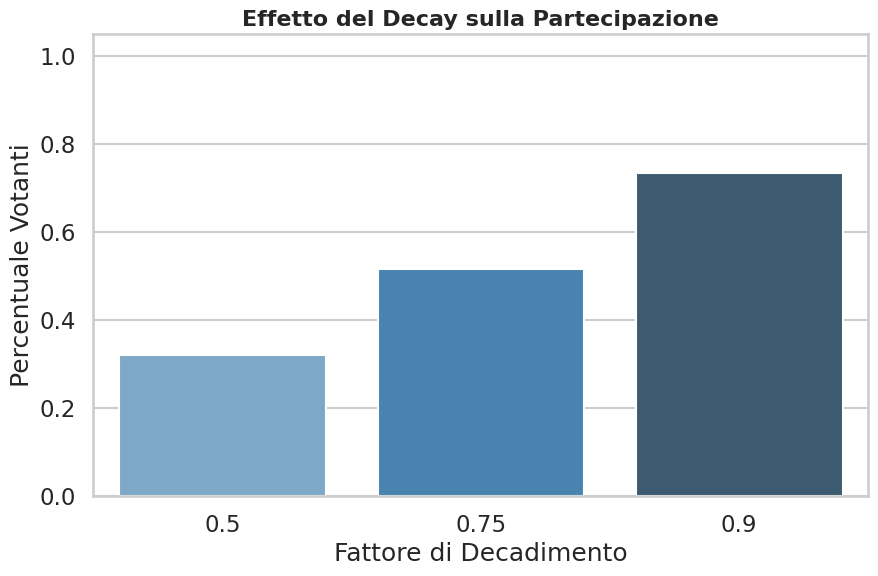

In [3]:
# GRAFICO 1 (Decay vs Turnout)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Decay Factor',
    y='Turnout %',
    palette="Blues_d",
    ci=None
)
plt.title('Effetto del Decay sulla Partecipazione', fontsize=16, fontweight='bold')
plt.ylabel('Percentuale Votanti')
plt.xlabel('Fattore di Decadimento')
plt.ylim(0, 1.05)
plt.show()

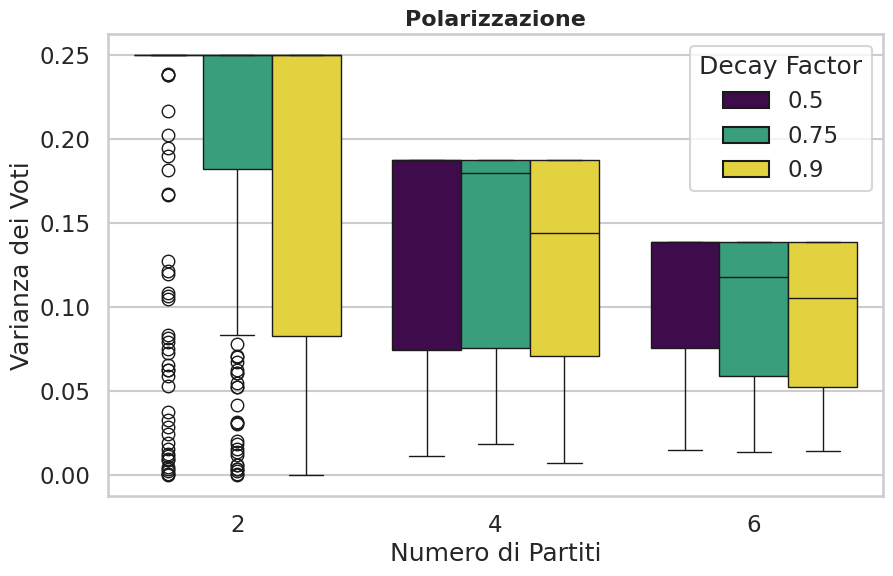

In [4]:
# GRAFICO 2 (Parties vs Polarization)

plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(
    data=df,
    x='Num Parties',
    y='Polarization',
    hue='Decay Factor', # Colore diverso per decay
    palette="viridis"
)

plt.title('Polarizzazione', fontsize=16, fontweight='bold')
plt.ylabel('Varianza dei Voti')
plt.xlabel('Numero di Partiti')
plt.legend(title='Decay Factor', loc='upper right')

plt.show()

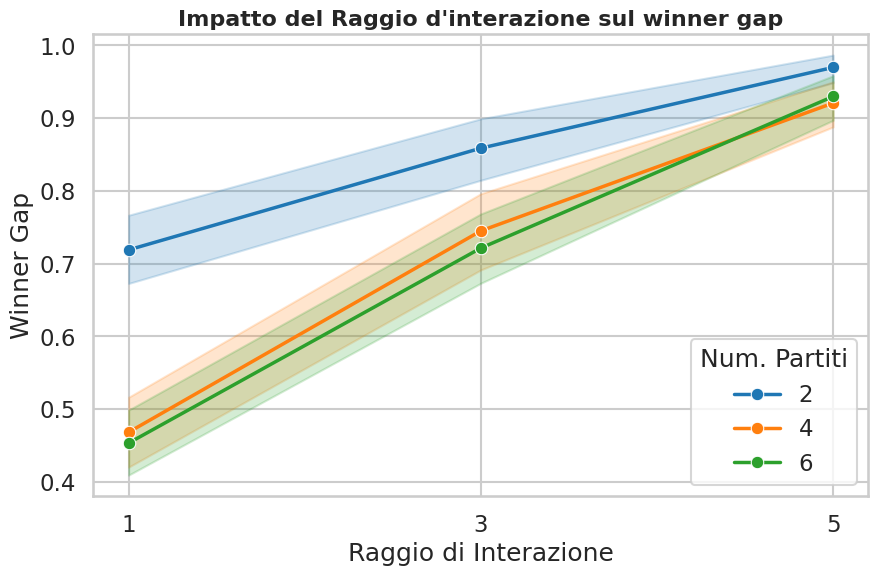

In [5]:
# GRAFICO 3 (Radius vs Winner Gap)

plt.figure(figsize=(10, 6))

# Lineplot
sns.lineplot(
    data=df,
    x='Interaction Radius',
    y='Winner Gap',
    hue='Num Parties', # Una linea per ogni configurazione di partiti
    marker='o',
    palette="tab10",
    linewidth=2.5
)

plt.title('Impatto del Raggio d\'interazione sul winner gap', fontsize=16, fontweight='bold')
plt.ylabel('Winner Gap')
plt.xlabel('Raggio di Interazione')
plt.xticks(sorted(df['Interaction Radius'].unique())) # Forza i numeri interi sull'asse X
plt.legend(title='Num. Partiti')

plt.show()